In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#✅ 1. Data Collection & Preparation


In [ ]:
# Ethereum ticker symbol Yahoo finace
ticker="ETH-USD"

#Data range set karo
start_date="2015-01-01"
end_date="2025-01-01"

#Data Download
df=yf.download(ticker,start=start_date,end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,
2017-11-09,320.884003,329.451996,307.056000,308.644989,893249984
2017-11-10,299.252991,324.717987,294.541992,320.670990,885985984
2017-11-11,314.681000,319.453003,298.191986,298.585999,842300992
2017-11-12,307.907990,319.153015,298.513000,314.690002,1613479936
2017-11-13,316.716003,328.415009,307.024994,307.024994,1041889984
...,...,...,...,...,...
2024-12-27,3328.916992,3436.710693,3302.575684,3331.053711,24091627403
2024-12-28,3397.902344,3419.920166,3318.033936,3328.774658,14305648523


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2017-11-09 to 2024-12-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, ETH-USD)   2610 non-null   float64
 1   (High, ETH-USD)    2610 non-null   float64
 2   (Low, ETH-USD)     2610 non-null   float64
 3   (Open, ETH-USD)    2610 non-null   float64
 4   (Volume, ETH-USD)  2610 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 122.3 KB


In [ ]:
print('Columns of the data :',df.shape[1])
print('Row of data :',df.shape[0])

Columns of the data : 5
Row of data : 2610


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,ETH-USD,0
High,ETH-USD,0
Low,ETH-USD,0
Open,ETH-USD,0
Volume,ETH-USD,0


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
count,2610.000000,2610.000000,2610.000000,2610.000000,2.610000e+03
mean,1491.479418,1531.307179,1445.989309,1490.491414,1.302109e+10
std,1226.561428,1259.122041,1190.249778,1226.524050,1.058960e+10
min,84.308296,85.342743,82.829887,84.279694,6.217330e+08
25%,268.782860,274.589233,262.000687,268.744484,5.559803e+09
50%,1354.947632,1392.850647,1309.168030,1355.769226,1.061880e+10
75%,2412.390747,2477.011108,2322.481445,2405.507324,1.768767e+10
max,4812.087402,4891.704590,4718.039062,4810.071289,8.448291e+10


#📊 2. Exploratory Data Analysis (EDA)


<Figure size 2000x2000 with 0 Axes>

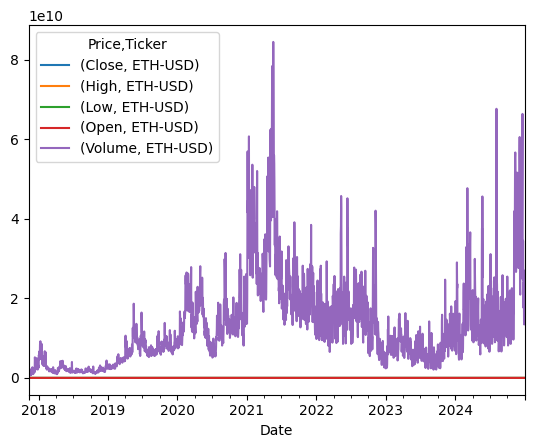

<Figure size 2000x2000 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,20))
df.plot()
plt.figure(figsize=(20,20))
plt.show()

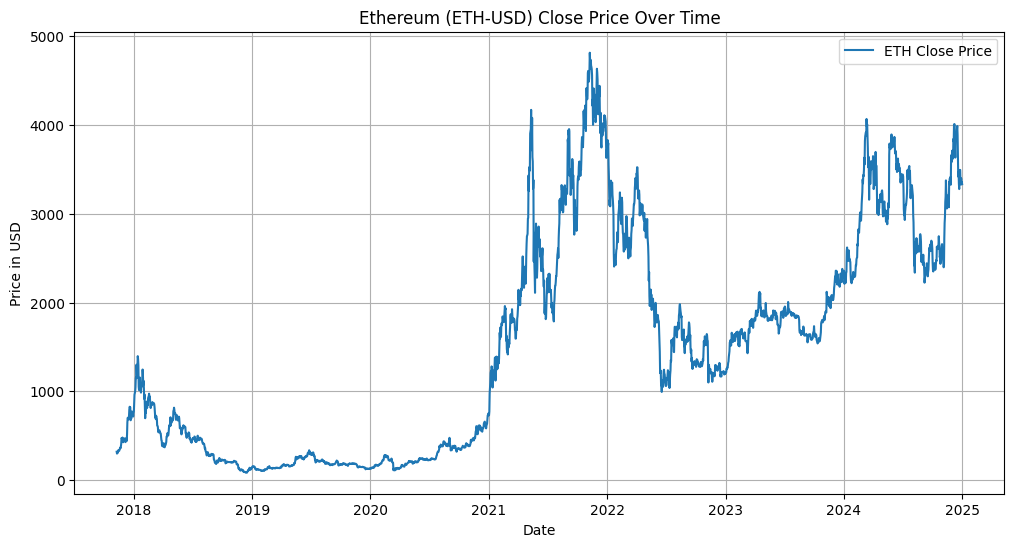

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='ETH Close Price')
plt.title("Ethereum (ETH-USD) Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.grid(True)
plt.show()

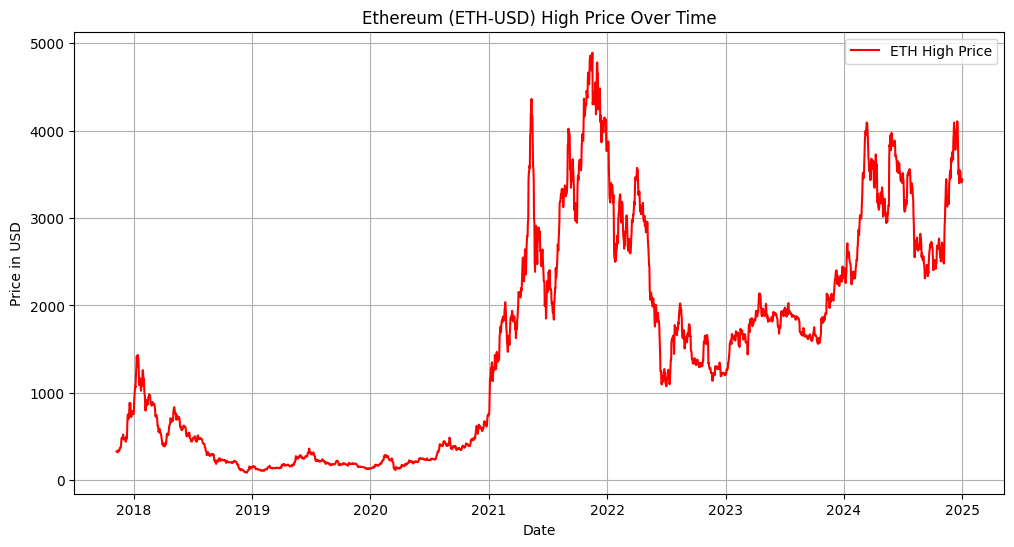

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['High'], label='ETH High Price',color='red')
plt.title("Ethereum (ETH-USD) High Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.grid(True)
plt.show()


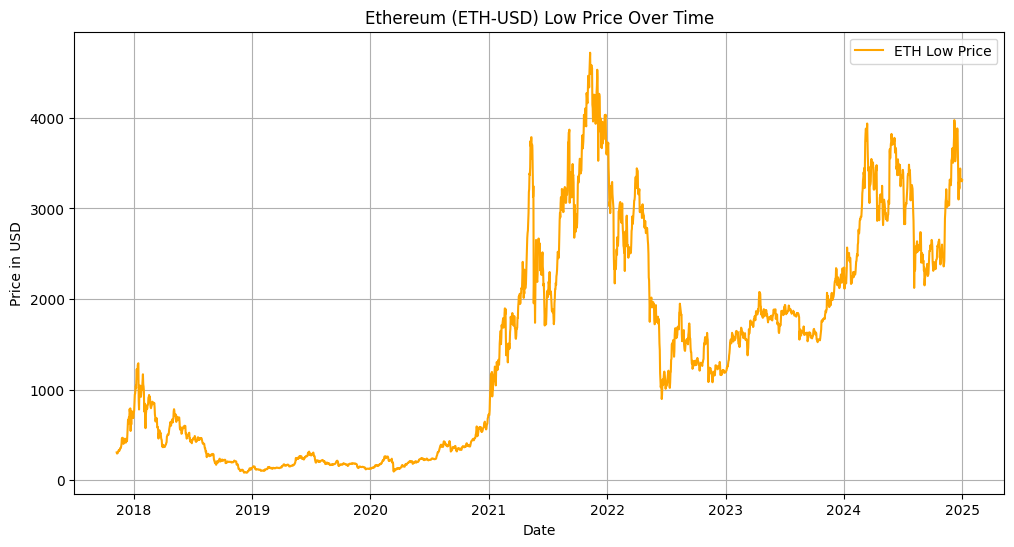

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Low'], label='ETH Low Price',color='orange')
plt.title("Ethereum (ETH-USD) Low Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.grid(True)
plt.show()


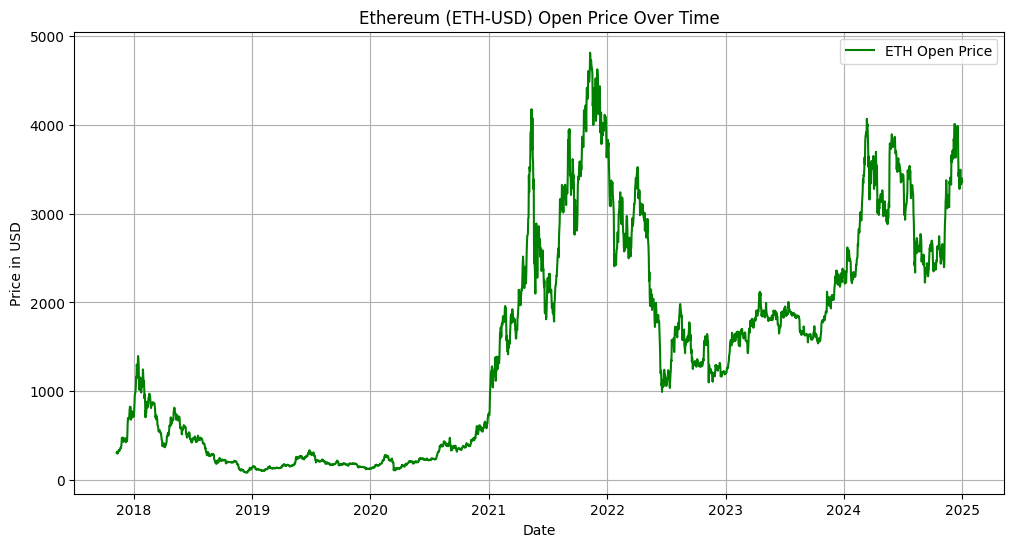

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label='ETH Open Price',color='green')
plt.title("Ethereum (ETH-USD) Open Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.grid(True)
plt.show()


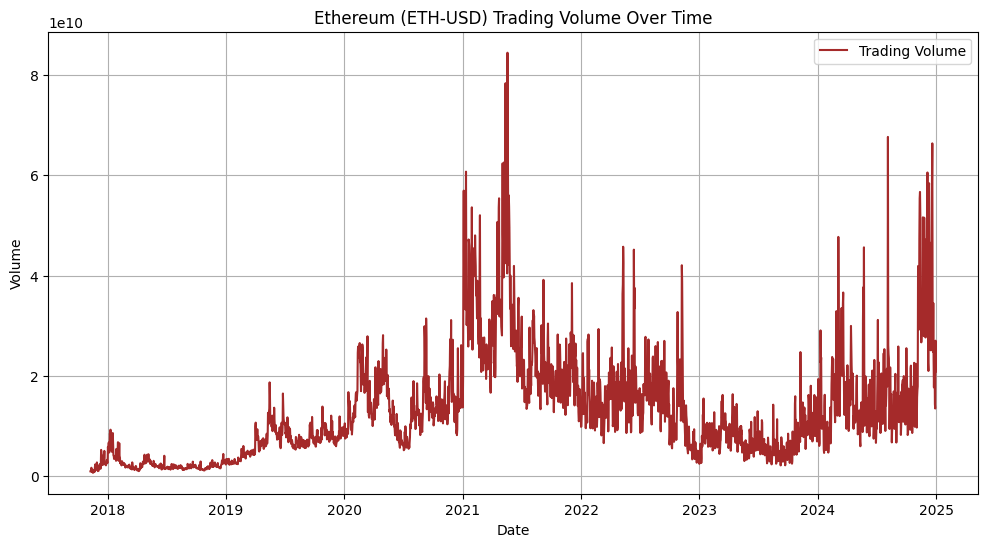

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label='Trading Volume', color='brown')
plt.title("Ethereum (ETH-USD) Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 7 or 30 days moving avarge calculate
df['7_day_MA']=df['Close'].rolling(window=7).mean()
df['30_day_MA']=df['Close'].rolling(window=30).mean()

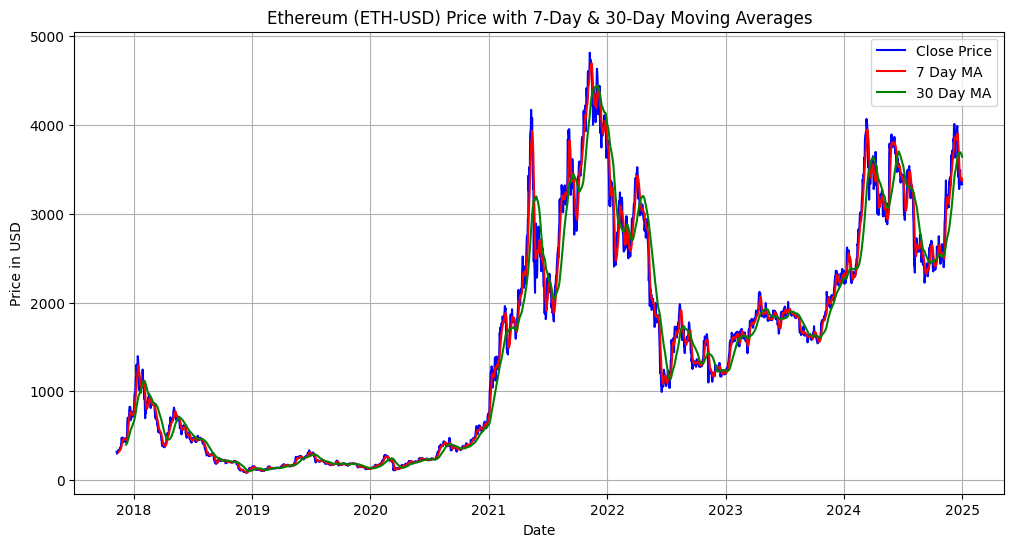

In [ ]:
# Create a plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label='Close Price',color='blue')
plt.plot(df['7_day_MA'],label='7 Day MA',color='red')
plt.plot(df['30_day_MA'],label='30 Day MA',color='green')

plt.title("Ethereum (ETH-USD) Price with 7-Day & 30-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.grid(True)
plt.show()


#📈 3. Stationarity Testing (ADF Test)


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Close price series
close_series = df['Close'].dropna()


In [ ]:
# ADF Test
adf_result_raw = adfuller(close_series)

In [ ]:
print("🔍 ADF Test on Raw Data")
print(f"ADF Statistic: {adf_result_raw[0]}")
print(f"P-value: {adf_result_raw[1]}")
print("Critical Values:")
for key, value in adf_result_raw[4].items():
    print(f"   {key}: {value}")


🔍 ADF Test on Raw Data
ADF Statistic: -1.3240965688945538
P-value: 0.6180772794681944
Critical Values:
   1%: -3.4328753811355464
   5%: -2.862655717379379
   10%: -2.567363936620037


In [ ]:
if adf_result_raw[1] < 0.05:
    print("\n✅ Conclusion: Time series is **stationary** (P-value < 0.05)")
else:
    print("\n❌ Conclusion: Time series is **NOT stationary** (P-value >= 0.05). Differencing required.")



❌ Conclusion: Time series is **NOT stationary** (P-value >= 0.05). Differencing required.


In [ ]:
# First-order differencing
df['Close_diff'] = df['Close'].diff().dropna()

# ADF Test on differenced data
adf_result_diff = adfuller(df['Close_diff'].dropna())

print("\n📉 ADF Test on Differenced Data")
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"P-value: {adf_result_diff[1]}")
print("Critical Values:")
for key, value in adf_result_diff[4].items():
    print(f"   {key}: {value}")



📉 ADF Test on Differenced Data
ADF Statistic: -12.707950107182093
P-value: 1.0451440502673556e-23
Critical Values:
   1%: -3.4328753811355464
   5%: -2.862655717379379
   10%: -2.567363936620037


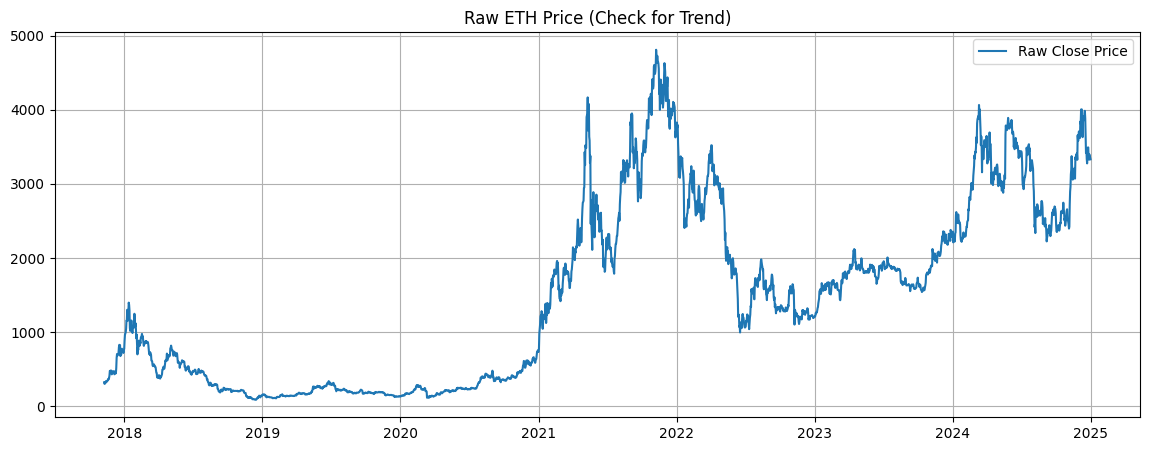

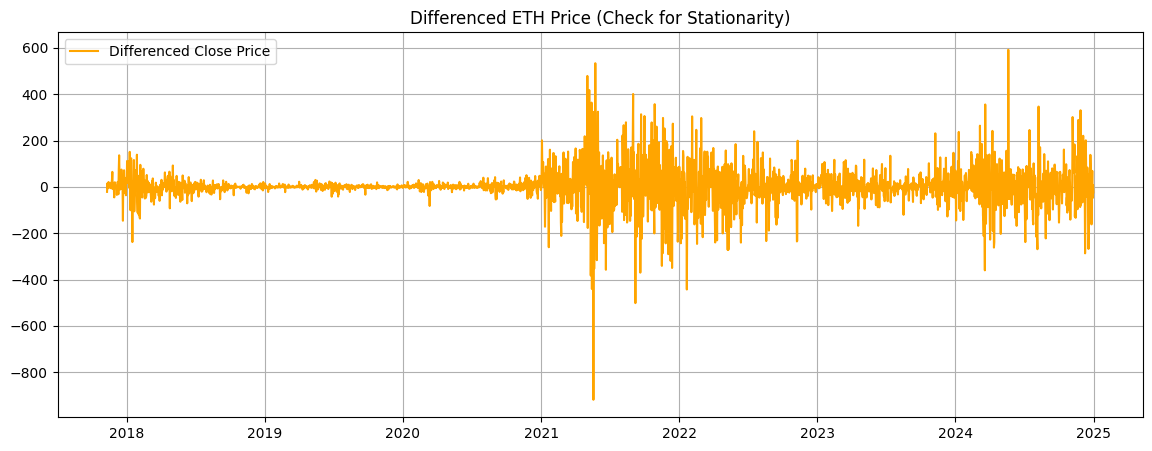

In [ ]:
# Plot raw Close price
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='Raw Close Price')
plt.title('Raw ETH Price (Check for Trend)')
plt.grid(True)
plt.legend()
plt.show()

# Plot differenced Close price
plt.figure(figsize=(14, 5))
plt.plot(df['Close_diff'], label='Differenced Close Price', color='orange')
plt.title('Differenced ETH Price (Check for Stationarity)')
plt.grid(True)
plt.legend()
plt.show()


#           🔍 ADF Test on Raw Data:
###***Metric	Value
###***ADF Statistic :	-1.32
###***P-value	: 0.618
###***Conclusion :	❌ Not Stationary

#         📉 ADF Test on Differenced Data:
###***Metric	Value
###***ADF Statistic :	-12.71
###***P-value	: 1.04e-23 (≈ 0.00000000000000000000001)
###**Conclusion	: ✅ Stationary



# **⚙️ 4. ARIMA Model Development**

##🔹 Step 1: ACF Plot (AutoCorrelation Function)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

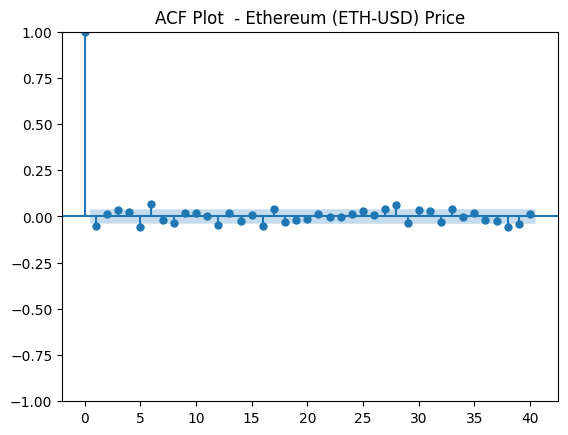

In [ ]:
plot_acf(df['Close'].diff().dropna(),lags=40)
plt.title('ACF Plot  - Ethereum (ETH-USD) Price')
plt.show()

###🔹 Step 2: PACF Plot (Partial AutoCorrelation Function)


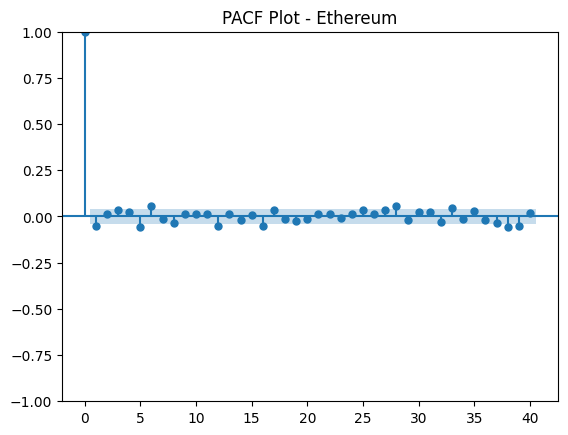

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Close'].diff().dropna(), lags=40)
plt.title("PACF Plot - Ethereum")
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'].diff().dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -12.707950107182093
p-value: 1.0451440502673556e-23


###🔹 Step 3: ARIMA Model Train Karna


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(df['Close'],order=(1,1,2))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit=model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                ETH-USD   No. Observations:                 2610
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -15104.274
Date:                Sat, 14 Jun 2025   AIC                          30216.549
Time:                        19:33:44   BIC                          30240.016
Sample:                    11-09-2017   HQIC                         30225.050
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5866      0.212      2.761      0.006       0.170       1.003
ma.L1         -0.6383      0.214     -2.988      0.003      -1.057      -0.220
ma.L2          0.0571      0.012      4.830      0.0

In [ ]:
for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            try:
                model = ARIMA(df['Close'], order=(p, d, q))
                result = model.fit()
                print(f"ARIMA({p},{d},{q}) AIC={result.aic}")
            except:
                continue


# **📏 5. Model Evaluation**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Difference series already known: d = 1
train_data = df['Close']

# Train ARIMA(2,1,2)
model = ARIMA(train_data, order=(2,1,2))
model_fit = model.fit()

# Predictions (in-sample forecast)
pred = model_fit.predict(start=1, end=len(train_data)-1, typ='levels')  # skip first value due to differencing

# Align actual values (skip first due to shift)
actual = train_data[1:]


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# RMSE
rmse = np.sqrt(mean_squared_error(actual, pred))
print(f"RMSE: {rmse:.2f}")

# MAPE
mape = mean_absolute_percentage_error(actual, pred) * 100
print(f"MAPE: {mape:.2f}%")


RMSE: 78.56
MAPE: 3.35%


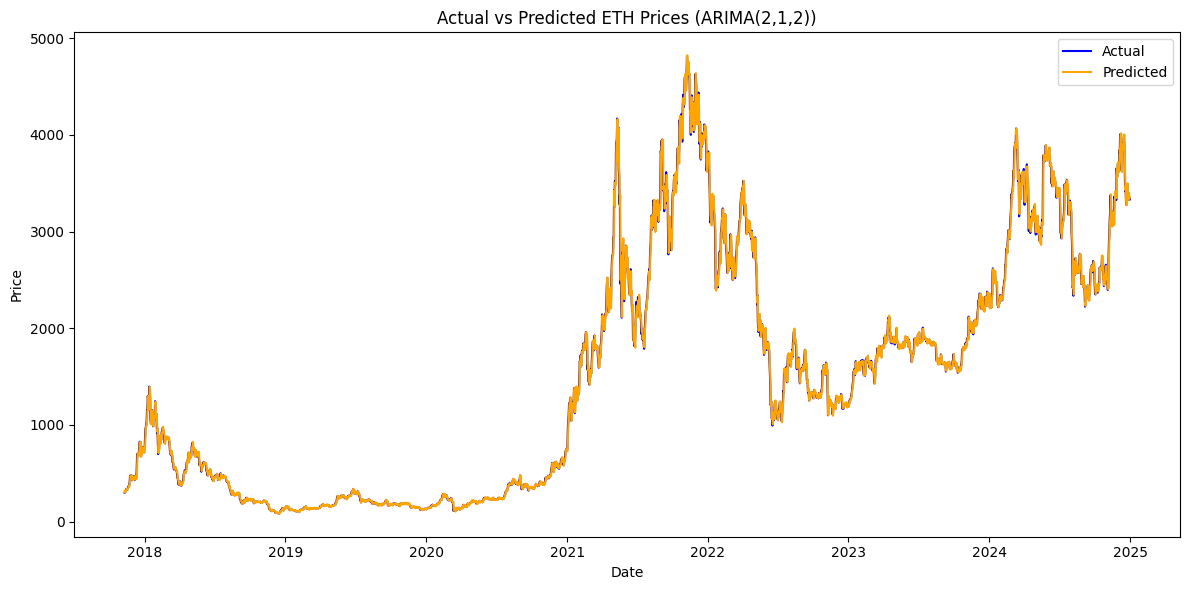

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(actual.index, actual, label='Actual', color='blue')
plt.plot(pred.index, pred, label='Predicted', color='orange')
plt.title('Actual vs Predicted ETH Prices (ARIMA(2,1,2))')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


# **📅 6. Forecasting & Visualization with ARIMA**

##🧮 Step 1: 30 Days Forecast Code


In [ ]:
# Forecast next 30 days
forecast_result = model_fit.get_forecast(steps=30)

# Extract predicted mean and confidence intervals
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Create forecast index (next 30 dates)
last_date = train_data.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
forecast.index = forecast_index
conf_int.index = forecast_index


## 📊 Step 2: Plot Forecast with Confidence Interval


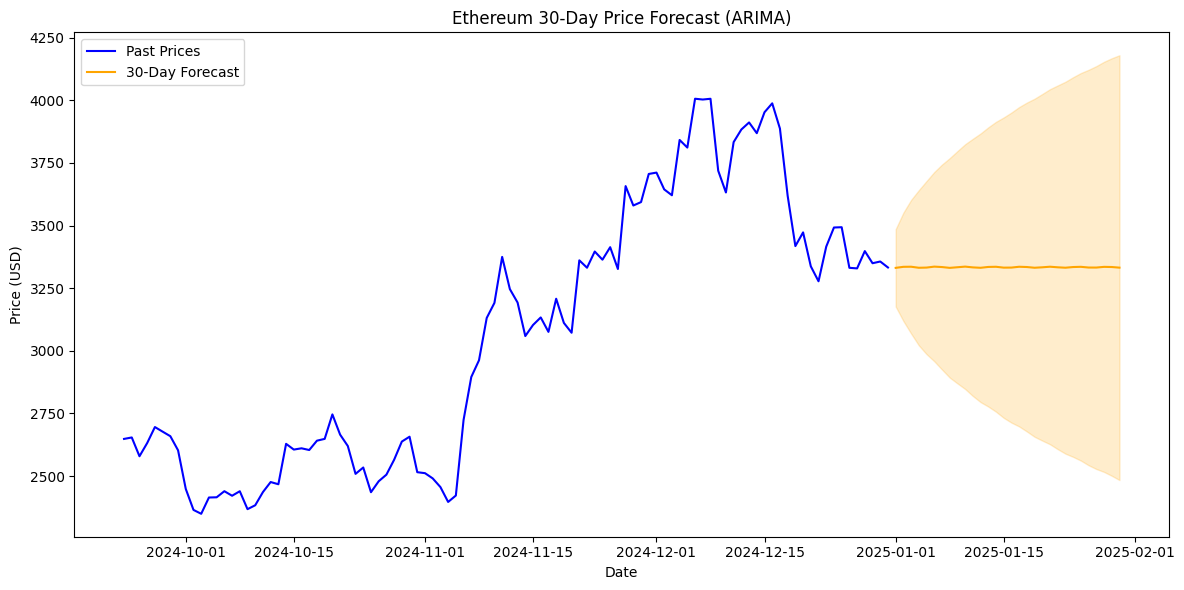

In [ ]:
plt.figure(figsize=(12, 6))

# Plot historical prices
plt.plot(train_data[-100:], label='Past Prices', color='blue')

# Plot forecasted values
plt.plot(forecast, label='30-Day Forecast', color='orange')

# Fill confidence intervals
plt.fill_between(forecast.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='orange', alpha=0.2)

plt.title('Ethereum 30-Day Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print(forecast.head())


2025-01-01    3331.026012
2025-01-02    3335.190194
2025-01-03    3335.562490
2025-01-04    3331.435959
2025-01-05    3332.150641
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
print(conf_int.head())


            lower ETH-USD  upper ETH-USD
2025-01-01    3176.714132    3485.337892
2025-01-02    3118.954375    3551.426014
2025-01-03    3068.959456    3602.165524
2025-01-04    3021.773184    3641.098735
2025-01-05    2986.845289    3677.455993
